In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [2]:
df=pd.read_csv("winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In this dataframe we have 11 types of independent variable which are deciding that what quality of wine it would be by the amount of comonent we are using to make a wine. In this project we check which component is affecting more for wine quality and will also remove the components not affecting wine quality very much.

In [6]:
df.shape

(1599, 12)

In [7]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

We can see that we have 11 independent variable and 1 dependent variable as quality here.

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

we have all the independent variable as float and dependent variable as int type, we'll check if we can change our dependent variable as catagorical data let's first analys data by non-graphical and graphical analysis.

In [25]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

we can see that we do not have any null value in our dataset which will be good for analysis.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


here we have checked null values by numerical analysis

<Axes: >

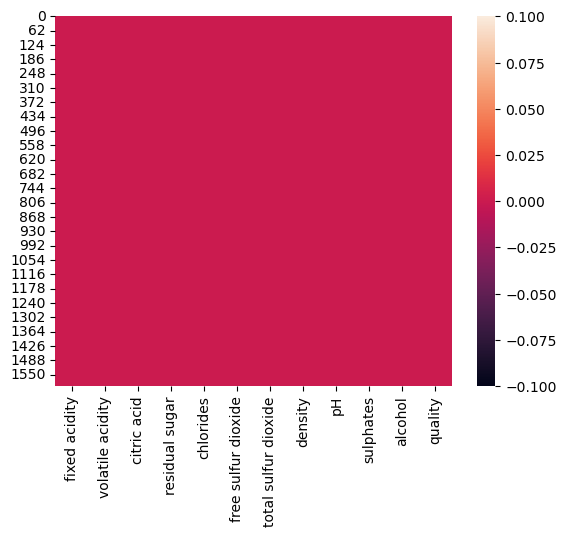

In [16]:
# let's check null values by heatmap

sns.heatmap(df.isnull())

We can see that color of our graph is of the color near to 0  which states that we do not have any null value in our dataset.

In [19]:
#Let's chec unique values 
df.nunique().to_frame("Unique values")

,Unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [20]:
df.duplicated().sum()

240

We can see here that we are having 240 duplicate row in our dataframe in which all the components are same with one of the another row so let us remove duplicated row so that we can predict our solution effectively

In [4]:
#let's drop duplicate rows here
df1=df.drop_duplicates()

In [22]:
df1.duplicated().sum()

0

We can see that now we do not have any duplicate row in our dataframe

In [23]:
df1.shape

(1359, 12)

Earlier we were having 1599 rows however after removal of duplicate row we are only having 1359 rows, this means we have successfully removed the dulicated row.

In [24]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Following is the complete analysis of data in which we can see that our data is absolutely perfect as we are not getting any negative value.

Here are some observation as per above date.

We can see that the count of all columns are same it means our data is perfect and ready to work with.

We can not see much difference in mean and median of independent variable except total sulphur dioxide so here we can see that mean is much greater that it's median this means it is right skewed.

By analysing the data we can see that there is huge difference in 75 percentile and maximum value of fixed acidity, residual sugar and total sulfur dioxide this means there is high chances of having utliers in it.

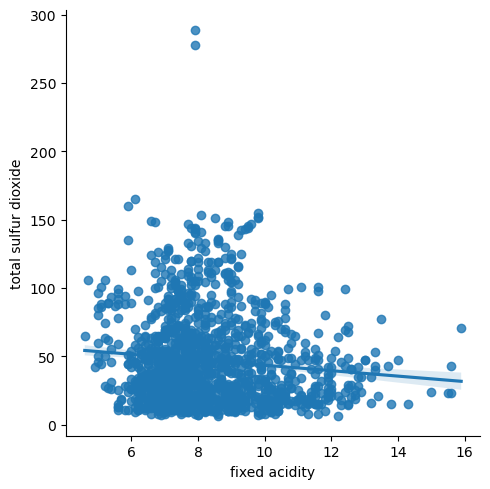

In [26]:
sns.lmplot(x='fixed acidity',y='total sulfur dioxide',data=df1,palette='colorblind')

In [27]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


We can see that there is no high positive or negative correlation between our data 

Text(0.5, 1.0, 'indegrends')

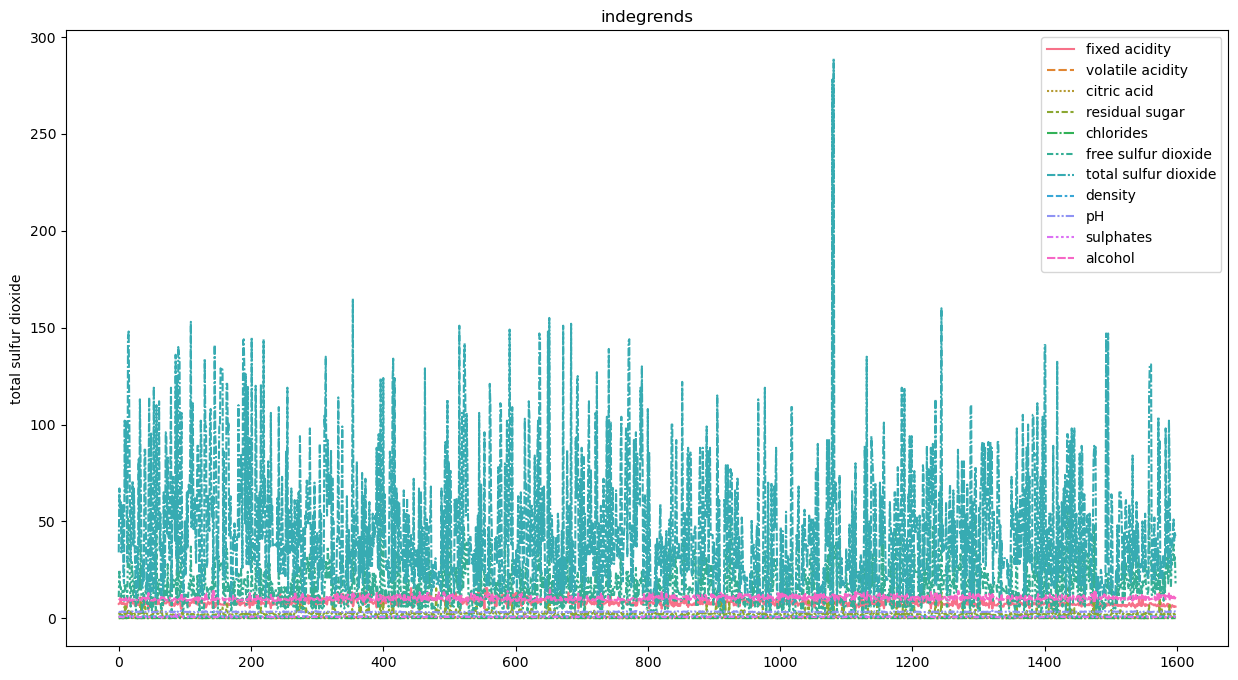

In [6]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel('total sulfur dioxide')
plt.title('indegrends')

<Axes: >

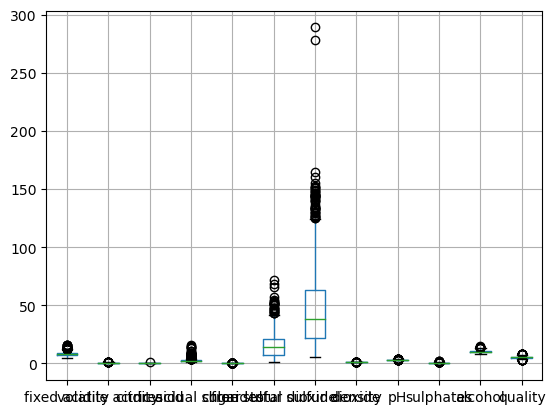

In [7]:
# let's check outliers by plotting a boxplot
df1.boxplot()

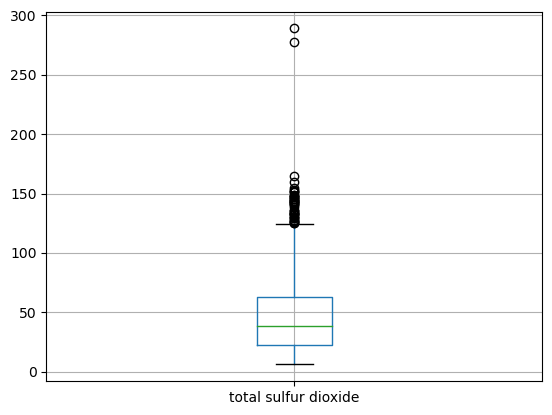

In [8]:
Box1=df1.boxplot(column="total sulfur dioxide")

We can see that we have too much outliers in this column which we will remove in further data processing process.

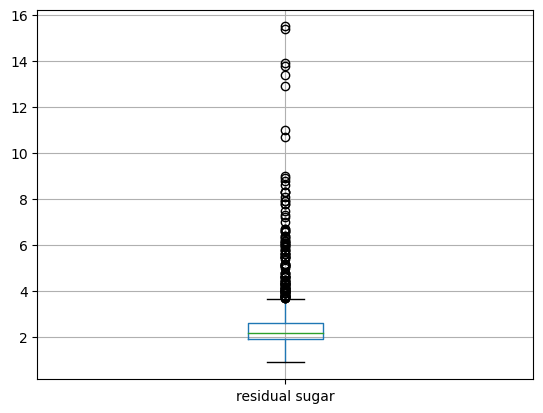

In [9]:
Box2=df1.boxplot(column="residual sugar")

In residual sugar also we can see there is too much outliers.

Text(0.5, 1.0, '')

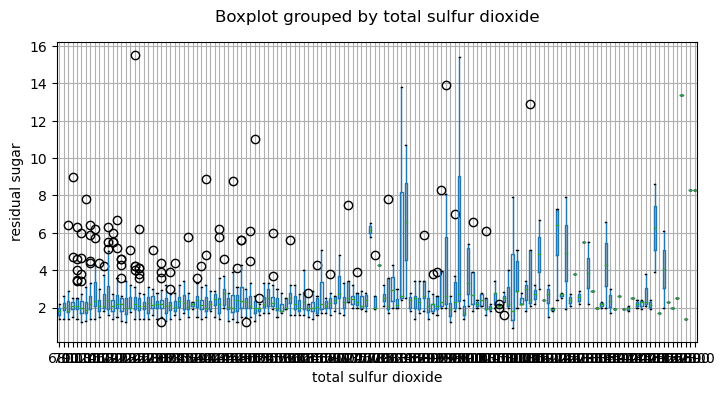

In [10]:
Box=df1.boxplot(column="residual sugar", by="total sulfur dioxide", figsize=(8,4))
Box.set_ylabel("residual sugar")
Box.set_title("")

In [12]:
#Let's check outlier's now
outliers=df1[['total sulfur dioxide','residual sugar']]
z=np.abs(zscore(outliers))
z

,total sulfur dioxide,residual sugar
0,0.384050,0.461157
1,0.604073,0.056665
2,0.214813,0.165259
3,0.394471,0.461157
5,0.204391,0.535132
...,...,...
1593,0.264277,0.461157
1594,0.084619,0.387183
1595,0.124983,0.239233
1597,0.084619,0.387183


In [13]:
np.where(z>3)

(array([  13,   30,   99,  144,  145,  241,  282,  309,  346,  361,  363,
         420,  433,  448,  513,  516,  562,  562,  564,  565,  582,  592,
         764,  781,  786,  888,  912,  918,  918,  920,  920, 1013, 1052,
        1060, 1060, 1216, 1250, 1325, 1336, 1350], dtype=int64),
 array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64))

In [14]:
#We have successfully found outlier's lets remove them now
new_df=df1[(z<3).all(axis=1)]

In [15]:
new_df.shape

(1323, 12)

We can see that utliers has been removed from our data as previously we had 1359 rows and after removal of outliers we do only have 1323 row's in our dataframe now

In [16]:
#let's check our dataloss now.
print("dataloss =", ((df1.shape[0] - new_df.shape[0]) /df1.shape[0])*100)

dataloss = 2.6490066225165565


As it's only 2 percent we do not have to worry about this as we can bear this dataloss and work with data

In [18]:
#let's check skewness in our data now.   
new_df.skew()

fixed acidity           0.918252
volatile acidity        0.719744
citric acid             0.316421
residual sugar          2.294847
chlorides               5.583947
free sulfur dioxide     1.076248
total sulfur dioxide    1.132082
density                -0.025684
pH                      0.231369
sulphates               2.429585
alcohol                 0.841733
quality                 0.181291
dtype: float64

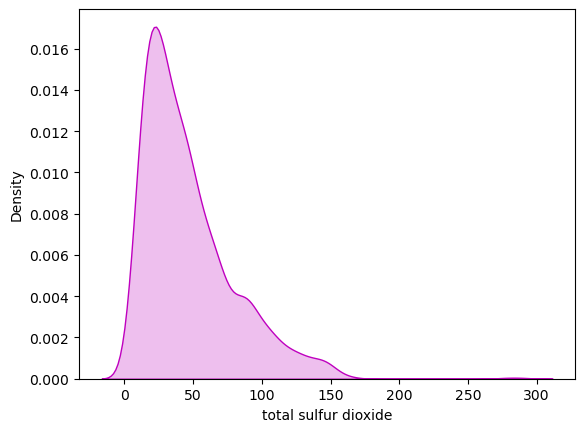

In [19]:
#Let's also check skewness by pplotting data

sns.distplot(df['total sulfur dioxide'],color="m", kde_kws = {"shade":True}, hist=False)
plt.show()

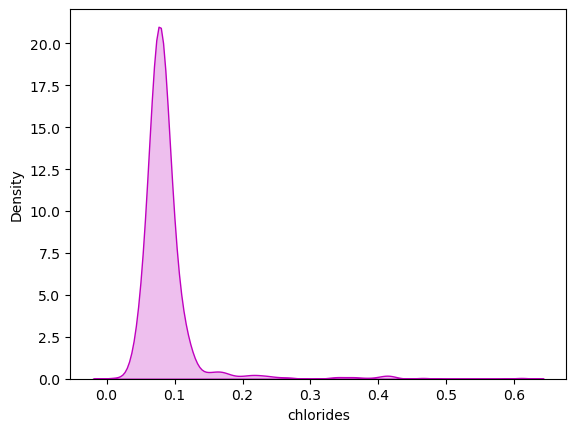

In [20]:
sns.distplot(df['chlorides'],color="m", kde_kws = {"shade":True}, hist=False)
plt.show()

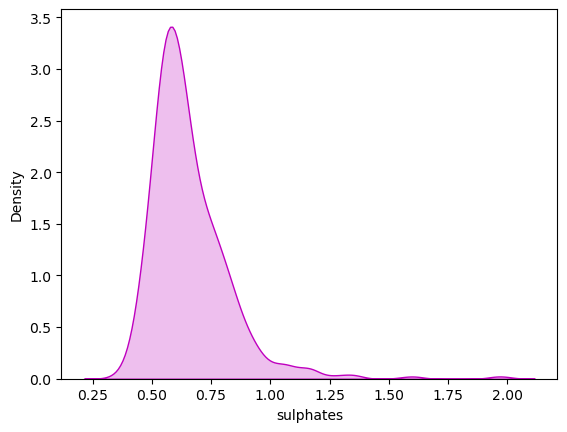

In [21]:
sns.distplot(df['sulphates'],color="m", kde_kws = {"shade":True}, hist=False)
plt.show()

We can see by above graphs that there is too much skewness in our data.

In [22]:
#Let's fix this skewness by cuberoot method, we are considering range from -0.7 to 0.7 by keeping data in mind.
new_df['fixed acidity']=np.cbrt(new_df['fixed acidity'])
new_df['residual sugar']=np.cbrt(new_df['residual sugar'])
new_df['chlorides']=np.cbrt(new_df['chlorides'])
new_df['free sulfur dioxide']=np.cbrt(new_df['free sulfur dioxide'])
new_df['total sulfur dioxide']=np.cbrt(new_df['total sulfur dioxide'])
new_df['sulphates']=np.cbrt(new_df['sulphates'])
new_df['alcohol']=np.cbrt(new_df['alcohol'])        

In [23]:
#Let's check skewness after treatment of data
new_df.skew()

fixed acidity           0.531976
volatile acidity        0.719744
citric acid             0.316421
residual sugar          1.466665
chlorides               3.139160
free sulfur dioxide     0.207993
total sulfur dioxide    0.310191
density                -0.025684
pH                      0.231369
sulphates               1.358450
alcohol                 0.714061
quality                 0.181291
dtype: float64

We have successfully trated skewness of most of data however chloride and residual sugar is still to much skewed and in this case we have to drop this columns

In [56]:
new_df['quality_label']=df['quality'].apply(lambda x: 'Good' if x >=6 else 'Bad')
     

Here we have added a coumn in which we have defined that above 6 and having 6 ratng wine is good and below 6 the wine is bad

In [57]:
new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,1.948695,0.700,0.00,1.238562,0.423582,2.223980,3.239612,0.99780,3.51,0.824257,2.110454,5,Bad
1,1.983192,0.880,0.00,1.375069,0.461044,2.924018,4.061548,0.99680,3.20,0.879366,2.139975,5,Bad
2,1.983192,0.760,0.04,1.320006,0.451436,2.466212,3.779763,0.99700,3.26,0.866239,2.139975,5,Bad
3,2.237378,0.280,0.56,1.238562,0.421716,2.571282,3.914868,0.99800,3.16,0.833955,2.139975,6,Good
5,1.948695,0.660,0.00,1.216440,0.421716,2.351335,3.419952,0.99780,3.51,0.824257,2.110454,5,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,1.894536,0.620,0.08,1.238562,0.408166,3.036589,3.361975,0.99651,3.42,0.935990,2.117912,6,Good
1594,1.837091,0.600,0.08,1.259921,0.448140,3.174802,3.530348,0.99490,3.45,0.833955,2.189760,5,Bad
1595,1.806969,0.550,0.10,1.300591,0.395789,3.391211,3.708430,0.99512,3.52,0.912581,2.237378,6,Good
1597,1.806969,0.645,0.12,1.259921,0.421716,3.174802,3.530348,0.99547,3.57,0.892112,2.168703,5,Bad


In [62]:
quality = 'quality'
if quality in new_df.columns:
    new_df = new_df.drop(quality, axis=1)
else:
    print(f"Column '{quality}' does not exist.")

In [64]:
#Now lets seperate our dependent and independent variable as Y and x variable.
x=new_df.iloc[:,1:12]
y=new_df["quality_label"]

In [65]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (1323, 11)
dimension of dependent variable: (1323,)


In [66]:
#Let's import neccesary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [69]:
maxAcc=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        RS=i
print("Max. r2 score is", maxAccu, "on random state", RS)

ValueError: could not convert string to float: 'Bad'